In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

## Understanding the problem

In [3]:
data_path = ("/home/alex/zriveAM/zrive-ds/aws/data")

In [4]:
orders = pd.read_parquet(f"{data_path}/orders.parquet")
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [5]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [6]:
users = pd.read_parquet(f"{data_path}/users.parquet")
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [7]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [8]:
regulars = pd.read_parquet(f"{data_path}/regulars.parquet")
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [9]:
regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [10]:
inventory = pd.read_parquet(f"{data_path}/inventory.parquet")
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [11]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


Limitations: We only have actual price (we can't calculate exact price of an order from 3 years ago)

In [12]:
abandoned_carts = pd.read_parquet(f"{data_path}/abandoned_carts.parquet")
abandoned_carts.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [13]:
abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


## ***Analysis***

1. Profiling our buyer population.

2. Analyse regulars products.

3. Reconstruct orders and abandoned orders with inventory information.

## 1. Profiling our customers

In [14]:
#number of regulars per user

n_regulars = (
    regulars.groupby("user_id")["variant_id"]
    .nunique()
    .reset_index()
    .rename(columns={"variant_id": "n_regulars"})
)

users = users.merge(n_regulars, on="user_id", how="left").fillna({"n_regulars": 0})



In [15]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0


In [16]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
23,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0
27,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0,1.0
28,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0,25.0
35,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0,72.0
66,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0,3.0


In [17]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,2.481437
std,1.365753,0.869577,1.026246,0.289086,0.995603,8.890588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,320.000000


Extremely useful.

Children: 

At least 25% of the families have 0 children.

At least 50% of the families have 0 children

At least 75% of the families have 1 children or less. At least 25 % of the families have 1 or more children

Regulars: 

At least 25% of users have 0 regular items

At least 50% of uses have 0 regular items

Only 25% of users have 1 or more regular items


<Axes: xlabel='count_adults'>

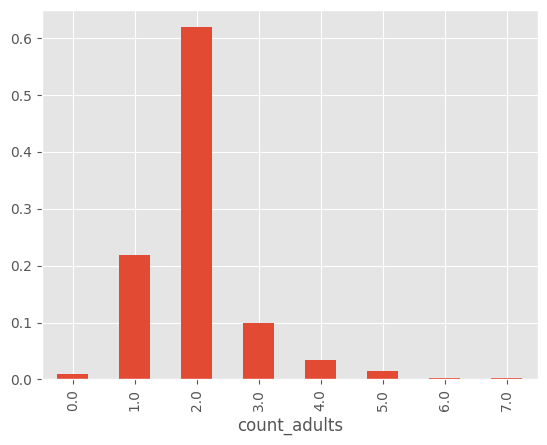

In [18]:
users["count_adults"].value_counts(normalize=True).sort_index().plot(kind="bar")

In [19]:
#n_regulars have a max value of 320 that is very extreme, let's analyse n_regulars{0,100}
users.loc[lambda x: x.n_regulars < 100].n_regulars.describe()

count    4981.000000
mean        2.396105
std         7.516721
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        90.000000
Name: n_regulars, dtype: float64

It's very similar

In [20]:
#percentage of users that have more than 10 regulars
(users.n_regulars > 10).sum() / len(users)

0.07264699979931769

Text(0.5, 1.0, 'Average number of regulars per user segment')

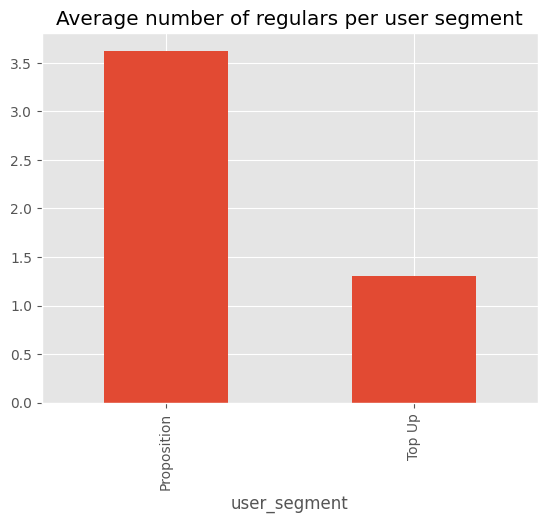

In [21]:
users.loc[lambda x: x.n_regulars < 100].groupby("user_segment")["n_regulars"].mean().plot(kind="bar")
plt.title("Average number of regulars per user segment")

Esto puede tener un problema, y es que quizas esta categorización quizas se defina por n_regulars, cuidado con extraer conclusiones causales de correlaciones o relaciones.

In [22]:
family_cols = [col for col in users.columns if col.startswith("count_")]
family_inputs = users.count_people.dropna().count()

d = {f"any_{col}": (users[col] > 0).sum() / family_inputs for col in family_cols}
d

{'any_count_people': 0.9938461538461538,
 'any_count_adults': 0.9907692307692307,
 'any_count_children': 0.4,
 'any_count_babies': 0.07076923076923076,
 'any_count_pets': 0.40615384615384614}

Que porcentaje de familias tienen al menos 1 adult, 1 children, 1 baby and 1 pet.

40% de las familias tienen al menos 1 niño.

40% de las familias tienen al menos 1 mascota.

7% familias tienen al menos un bebé.

In [23]:
(users[["count_children", "count_pets", "count_babies"]].sum(axis=1) > 0).sum() / family_inputs

0.6123076923076923

Porcentaje de familias que tienen 1 mascota o 1 children o 1 bebé.

39% de las familias no tienen ni mascota ni niño ni bebé.

user_segment  Proposition  Top Up
user_nuts1                       
UKC                    50      52
UKD                   140     218
UKE                   148     155
UKF                   127     125
UKG                   122     173
UKH                   221     193
UKI                   589     729
UKJ                   367     378
UKK                   311     291
UKL                    92     132
UKM                   146     169
UKN                     2       2


<Axes: xlabel='user_nuts1'>

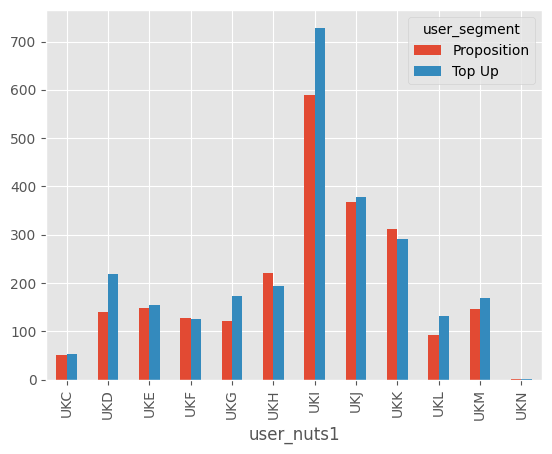

In [24]:
crosstab= pd.crosstab(users["user_nuts1"], users["user_segment"])
print(crosstab)
crosstab.plot(kind="bar")

Crosstab entre regiones y user_segment.

Se podrían crear hipótesis. ¿Son las campañas de marketing distintas entre UKI, UKD y UKG, y el resto de regiones? ¿Hay algo que defina estas diferencias entre regiones? 

### Insights

1. Many our users don't have regulars product (only 7% have more than 10 regulars)

2. Proposition users have way more regulars than top-up users (3x, without outliers)

3. We don't have family composition informationi for most of our customers (only for 6.5%)

4. Ourpopulation is mainly formed by adult couples (single households represent <25%)

5. Household have 60% of times either children, pets, or babies.

6. Only 7% of our customer base have babies

## 2. Understanding regulars products

In [25]:
regulars_df = regulars.merge(inventory, on="variant_id", how="left")

In [26]:
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


<Axes: xlabel='created_at'>

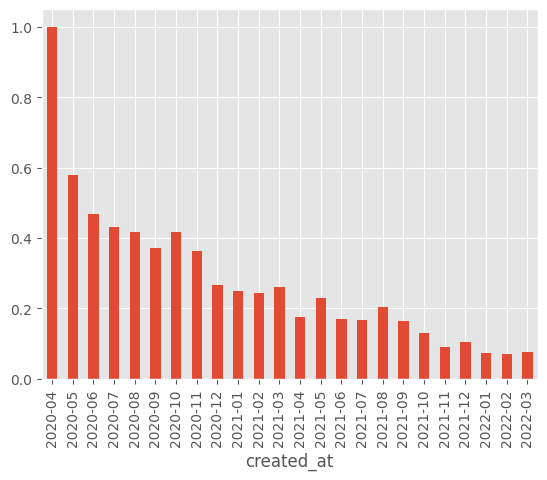

In [27]:
regulars_df.groupby(regulars_df.created_at.dt.to_period("M"))["price"].apply(lambda x: x.isna().sum() / len(x)).plot(kind="bar")

1. Truncar created_at a fecha mensual (1er dia del mes).

2. Agrupamos por mes con groupby.

3. Para cada grupo, cojo el precio y calculo cuantas filas de ese mes tienen el precio null / el numero de filas de ese mes.

Asi calculamos el porcentaje de productos regulares que se guardaron en ese mes cuyo valor es nulo.

Se confirma la hipótesis de que inventory solo muestra los productos disponibles actualmente, ya que los que más faltan son los que se pidieron hace tiempo.

In [28]:
regulars_df.created_at.min(), regulars_df.created_at.max()

(Timestamp('2020-04-30 13:09:27'), Timestamp('2022-03-14 07:49:24'))

In [29]:
regulars_df.isna().sum()

user_id                0
variant_id             0
created_at             0
price               3071
compare_at_price    3071
vendor              3071
product_type        3071
tags                3071
dtype: int64

In [30]:
clean_regulars = regulars_df.dropna()

<Axes: xlabel='variant_id'>

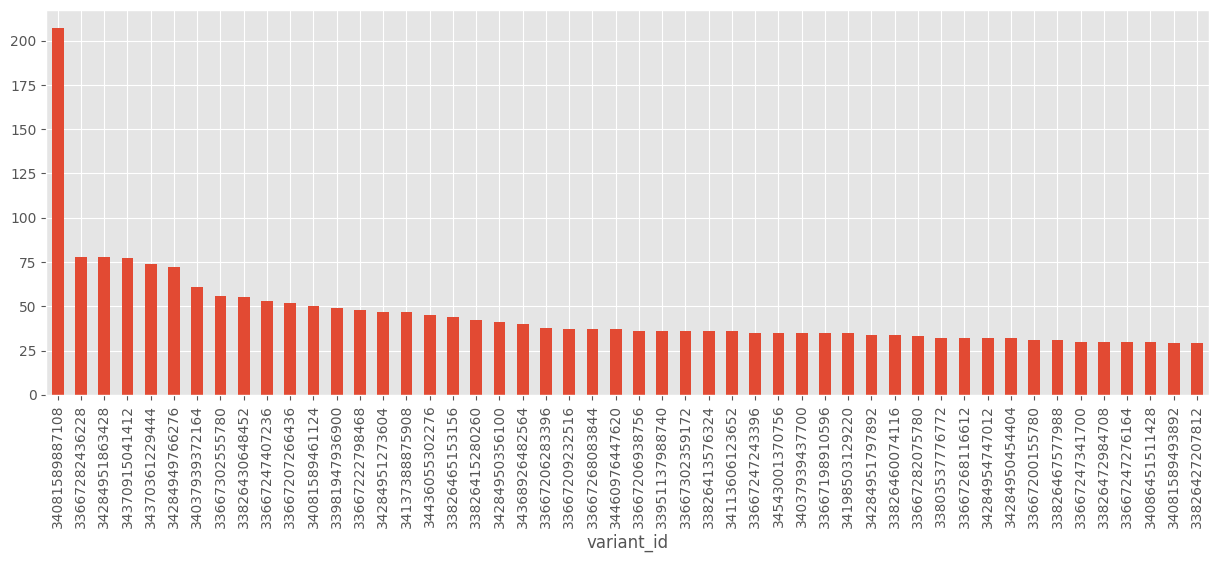

In [31]:
clean_regulars.groupby(["variant_id"])["user_id"].nunique().sort_values(ascending=False).head(50).plot(kind="bar", figsize=(15,5))

Para cada producto, ver cuantos usuarios se lo han guardado.

Cada producto en el groupby forma un grupo, ese grupo tiene varias columnas, nos centramos en user_id y quiero calcular cuantos valores unicos de user_id hay para cada producto(grupo).

Hay un producto que ha sido guardado por un monton de usuarios, el resto se va aplanando



In [32]:
top_product = (
    clean_regulars.groupby(["variant_id"])["user_id"]
    .nunique()
    .sort_values(ascending=False)  # lo mismo que antes
    .head(1)
    .index[0] #cojo el indice 0(variant_id se convierte en el indice al hacer groupby, para cambiar indice y volver a dataframe habria que hacer reset_index)
)

clean_regulars.loc[lambda x: x.variant_id == top_product][
    ["variant_id", "price", "product_type", "vendor"]
].drop_duplicates()

,variant_id,price,product_type,vendor
95,34081589887108,10.79,long-life-milk-substitutes,oatly


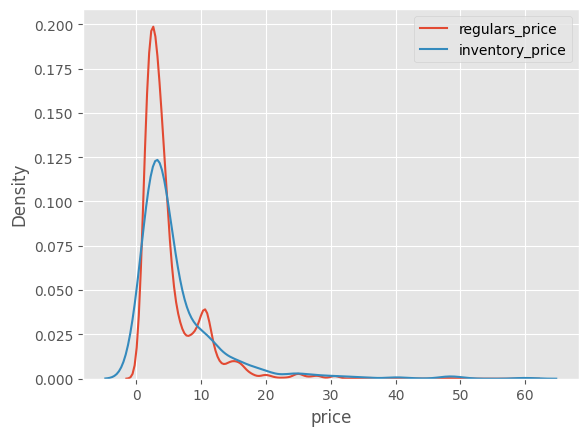

In [33]:
#distribucion precios de productos regulares y distribucion precios inventario
sns.kdeplot(clean_regulars.price, label="regulars_price")
sns.kdeplot(inventory.price, label="inventory_price")
plt.legend()

Text(0.5, 1.0, 'Top 50 vendors by number of regulars (out of 367 vendors)')

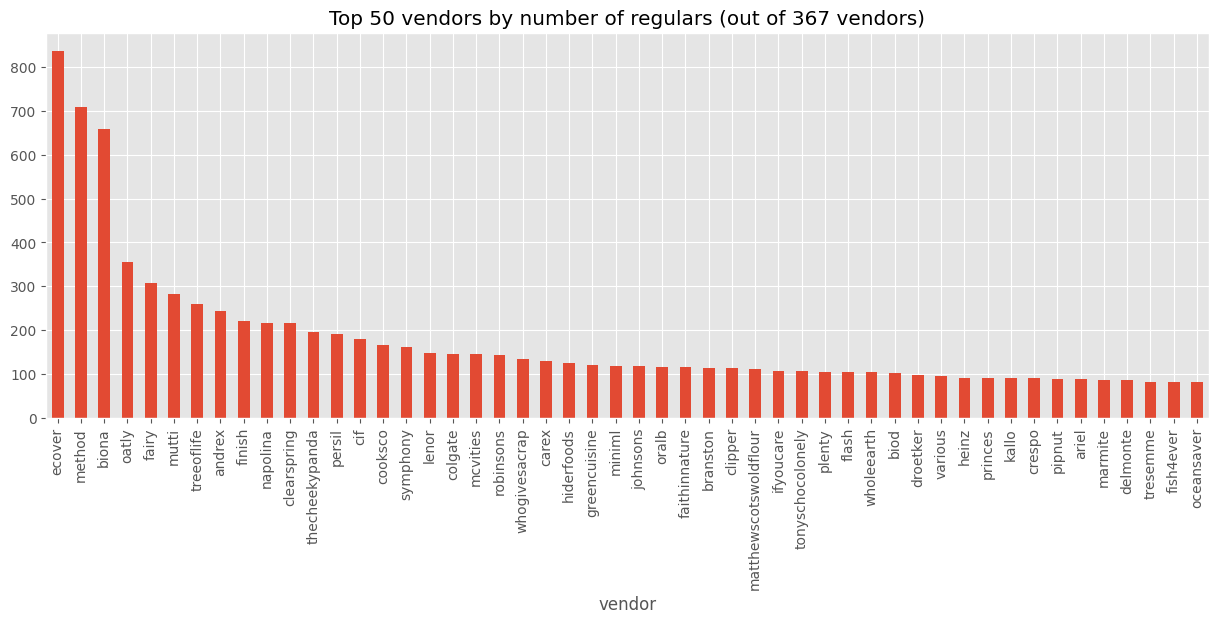

In [34]:
clean_regulars["vendor"].value_counts().head(50).plot(kind="bar", figsize=(15,5))
plt.title(f"Top 50 vendors by number of regulars (out of {clean_regulars.vendor.nunique()} vendors)")

Text(0.5, 1.0, 'Top 30 product type by number of regulars (out of 58 product_types)')

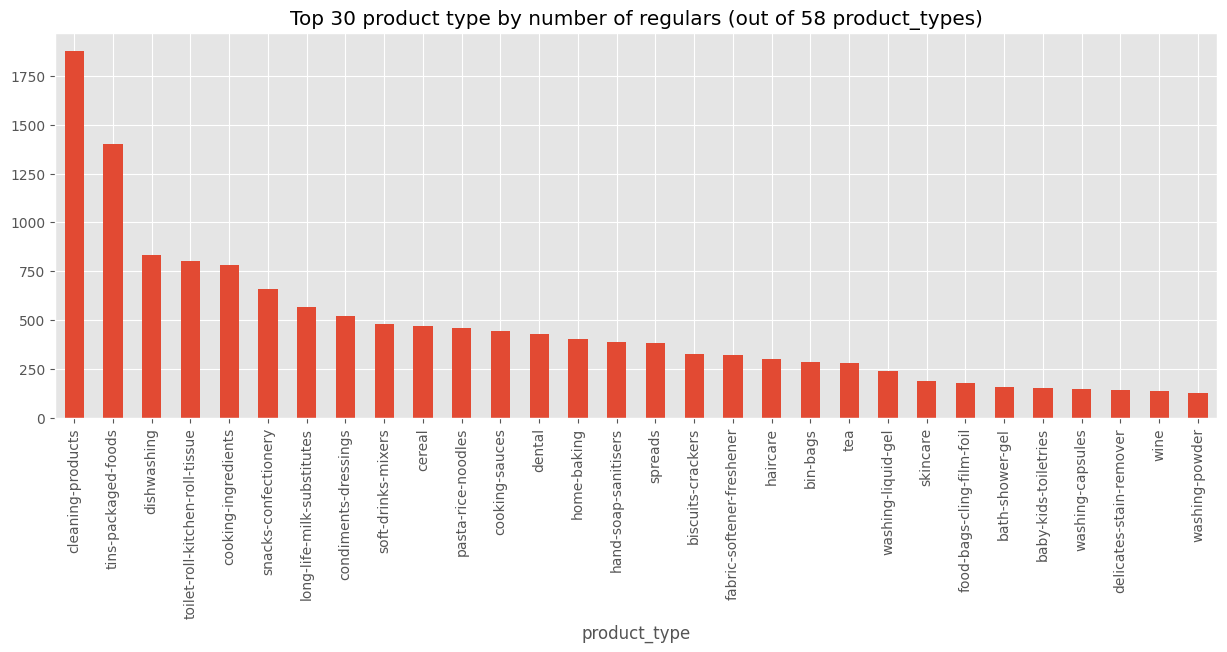

In [35]:
clean_regulars["product_type"].value_counts().head(30).plot(kind="bar", figsize=(15,5))
plt.title(f"Top 30 product type by number of regulars (out of {clean_regulars.product_type.nunique()} product_types)")

Text(0.5, 1.0, 'Top 30 product type by number of products (inventory) (out of 59 product_types)')

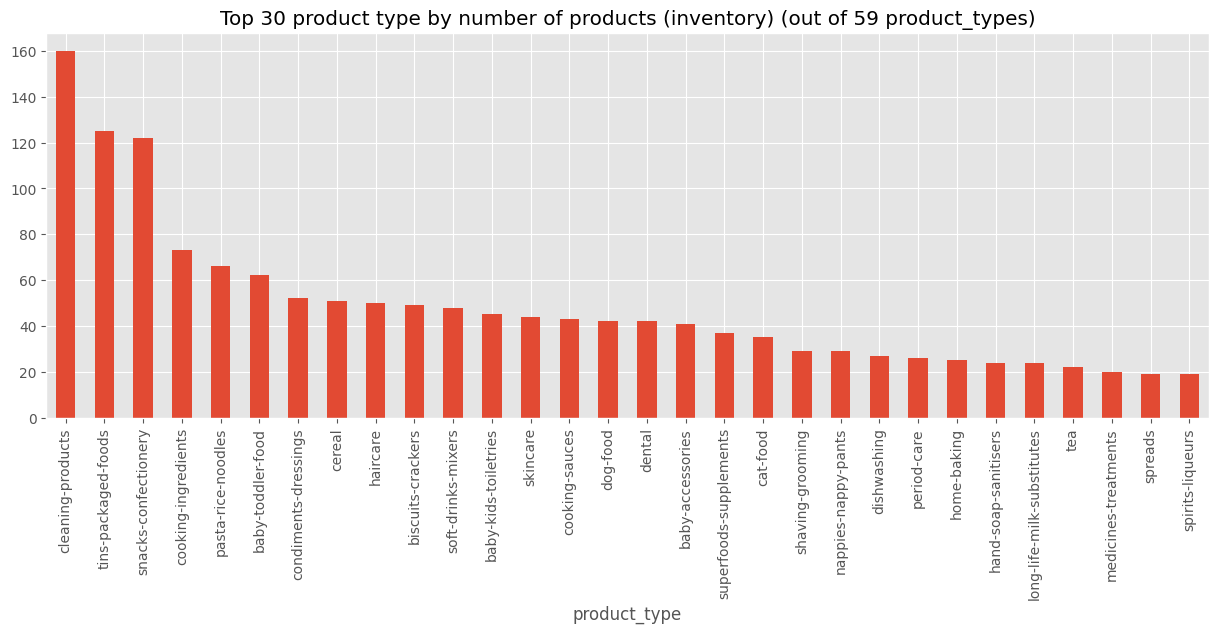

In [36]:
inventory["product_type"].value_counts().head(30).plot(kind="bar", figsize=(15,5))
plt.title(f"Top 30 product type by number of products (inventory) (out of {inventory.product_type.nunique()} product_types)")

Let's compare products in inventory and products in regulars

In [37]:
diff_prevalence = (
    inventory["product_type"]
    .value_counts(normalize=True)
    .rename("inventory_count")
    .reset_index()
    .merge(
        clean_regulars["product_type"]
        .value_counts(normalize=True)
        .rename("regulars_count")
        .reset_index()
    )
.assign(inventory_rank=lambda x: x.inventory_count.rank(ascending=False))
.assign(regulars_rank=lambda x: x.regulars_count.rank(ascending=False))
.assign(diff=lambda x: x.inventory_count - x.regulars_count)
)

In [38]:
diff_prevalence.sort_values("regulars_count", ascending=False).head(10)

,product_type,inventory_count,regulars_count,inventory_rank,regulars_rank,diff
0,cleaning-products,0.092325,0.124850,1.0,1.0,-0.032525
1,tins-packaged-foods,0.072129,0.093255,2.0,2.0,-0.021126
21,dishwashing,0.015580,0.055474,22.0,3.0,-0.039894
31,toilet-roll-kitchen-roll-tissue,0.010387,0.053346,32.5,4.0,-0.042959
3,cooking-ingredients,0.042123,0.052148,4.0,5.0,-0.010025
2,snacks-confectionery,0.070398,0.043900,3.0,6.0,0.026498
25,long-life-milk-substitutes,0.013849,0.037648,25.5,7.0,-0.023799
6,condiments-dressings,0.030006,0.034655,7.0,8.0,-0.004649
10,soft-drinks-mixers,0.027698,0.032061,11.0,9.0,-0.004363
7,cereal,0.029429,0.031329,8.0,10.0,-0.001900


Cleaning products --> 9% of the products in the inventory and 12% in regulars. Rank 1 both in inventory and regulars

Tins-packaged-foods --> 7% of the products in the inventory and 9% in regulars. Rank 2 both in inventory and regulars


Diswashing and toilet-roll-kitchen-roll-tissue have relevant info.

## Insights

1. There is an oatly milk product that is the big favourite of our clients

2. Apart from Oatly, other brands stand out (ecover, method, biona). All quite eco-friendly brands.

3. There is a gap between how many products we stock and their prevalence based on `product_type`. 

      `Diswashing`, `toilet-roll-kitchen-roll-tissue` and `long-life-milk-substitutes`are some product needs our customers are consuming way more that the share of inventory we stock
          Could this categories be a blueprint on how to nail the range/price/positioning problem?


      `snacks-confectionery` represent a big part of the inventory but are not as represented in regulars -> Deep dive to see desirability of the range

We can generate questions but not answers, but these are extremely important


## 3. Orders

In [39]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [40]:
orders.order_date.min(), orders.order_date.max()

(Timestamp('2020-04-30 00:00:00'), Timestamp('2022-03-14 00:00:00'))

In [41]:
orders.user_id.nunique()

4983

In [42]:
orders.loc[lambda x: x.user_order_seq > 1].user_id.nunique()

1411

<Axes: xlabel='user_order_seq'>

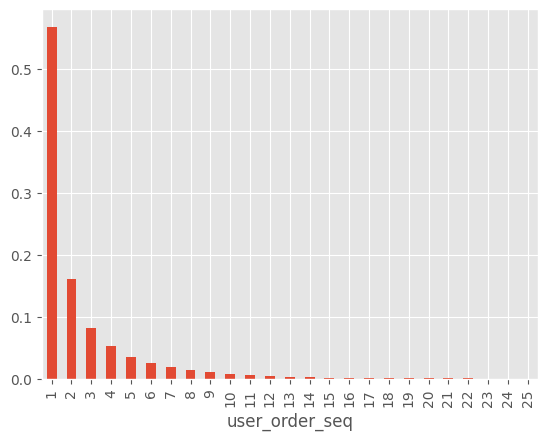

In [43]:
orders["user_order_seq"].value_counts(normalize=True).plot(kind="bar")

Esto nos da una idea de la recurrecncia o falta de recurrencia

In [44]:
#Explode ordered_items para tener en cada fila 1 elemento
order_items = orders.explode("ordered_items").rename({"ordered_items": "variant_id"}, axis=1)

In [45]:
order_items.head()

,id,user_id,created_at,order_date,user_order_seq,variant_id
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060


In [46]:
order_items = order_items.merge(inventory, on="variant_id", how="left")

In [47]:
print(f"pct of missing bought products on inventory: {100*order_items.price.isna().sum() / order_items.shape[0]:.2f} %")

pct of missing bought products on inventory: 14.45 %


In [48]:
order_items.dropna().head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."
77,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206283396,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,..."
81,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,39459277602948,5.79,5.98,ecloth,cleaning-products,"[eco, sponges-cloths-gloves]"


The first user_id in the .head has bought 2 of listerine product, it's important ordered_items to be a list and not a tuple

In [49]:
from typing import Literal
aggregation_levels = Literal['variant_id', 'product_type']

def compute_basket_composition(df: pd.DataFrame, level: aggregation_levels) -> pd.DataFrame:
    """
    Computes percentage of baskets that contain each level.
    """
    return (
        df.dropna(subset=[level])
        .drop_duplicates(subset=["id", level])
        .groupby([level])["id"]
        .nunique()
        .reset_index()
        .rename(columns={"id": "n_baskets"})
        .assign(pct_baskets=lambda x: x.n_baskets / orders.id.nunique())
    )

In [50]:
product_type_composition = compute_basket_composition(order_items, "product_type")

In [51]:
product_type_composition.sort_values(ascending=False, by="n_baskets").head(10)

,product_type,n_baskets,pct_baskets
12,cleaning-products,3500,0.398951
51,tins-packaged-foods,3281,0.373988
52,toilet-roll-kitchen-roll-tissue,3131,0.356890
29,long-life-milk-substitutes,2657,0.302861
20,dishwashing,2632,0.300011
44,snacks-confectionery,1920,0.218853
15,cooking-ingredients,1817,0.207113
45,soft-drinks-mixers,1793,0.204377
14,condiments-dressings,1732,0.197424
10,cereal,1653,0.188419


<Axes: xlabel='product_type'>

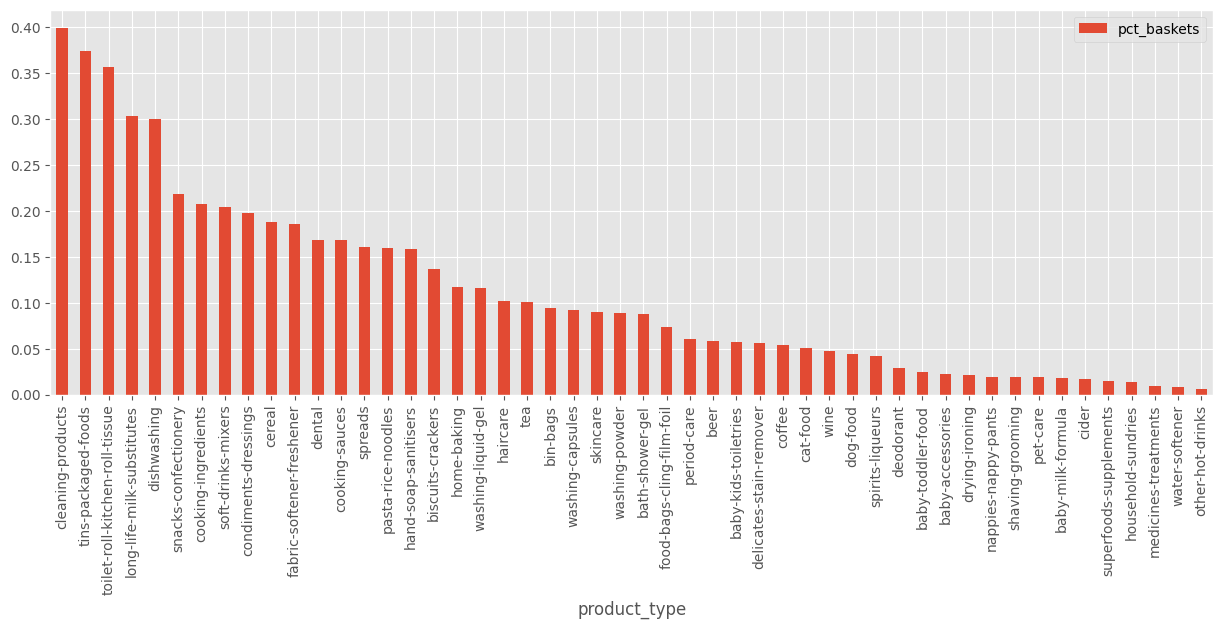

In [52]:
product_type_composition.sort_values(ascending=False, by="n_baskets").head(50).plot(
    x="product_type", y="pct_baskets", kind="bar", figsize=(15,5)
)

In [53]:
variant_id_composition = compute_basket_composition(order_items, "variant_id")

In [54]:
variant_id_composition.sort_values(ascending=False, by="n_baskets").head(10)

,variant_id,n_baskets,pct_baskets
1324,39284117930116,2658,0.302975
675,34081589887108,1616,0.184202
726,34137590366340,1459,0.166306
656,34081331970180,1170,0.133364
853,34284951863428,862,0.098256
829,34284949766276,617,0.070329
983,34370361229444,587,0.066910
835,34284950356100,561,0.063946
632,34037939372164,520,0.059273
993,34370915041412,504,0.057449


<Axes: xlabel='variant_id'>

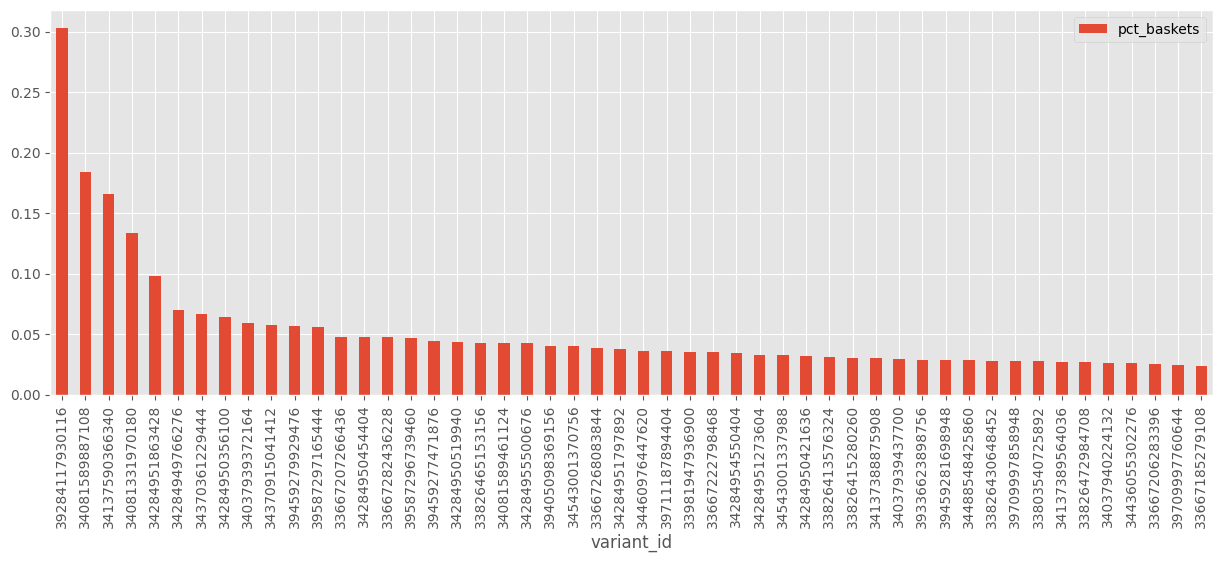

In [55]:
variant_id_composition.sort_values(ascending=False, by="n_baskets").head(50).plot(
    x="variant_id", y="pct_baskets", kind="bar", figsize=(15,5)
)

In [56]:
top_5_products = (
    variant_id_composition.sort_values(ascending=False, by="n_baskets")
    .head(5)
    .variant_id.values
)
inventory.loc[lambda x: x.variant_id.isin(top_5_products)]

,variant_id,price,compare_at_price,vendor,product_type,tags
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


De los 5 productos más vendidos historicamente, solo 2 siguen disponibles

In [57]:
#calcular tamaño de la orden y valor
def compute_orders_size_and_value(x):
    return pd.Series(
        {
            "order_size": len(x),
            "n_unique_products": x.variant_id.nunique(),
            "order_value": x.price.sum(),
            "ratio_missing_prod_data": x.price.isna().sum() / len(x)
        }

    )

orders_size = (
    order_items.groupby(["id", "order_date"])
    .apply(compute_orders_size_and_value)
    .reset_index()
)

/tmp/ipykernel_57559/1050440326.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_orders_size_and_value)


El valor va a ser mas ruidoso cuanto más lejos nos movamos en la historia y muchos productos no van a tener precio

In [58]:
orders_size.head()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
0,2204073066628,2020-04-30,14.0,12.0,0.00,1.0
1,2204707520644,2020-04-30,25.0,23.0,0.00,1.0
2,2204838822020,2020-04-30,15.0,13.0,0.00,1.0
3,2208967852164,2020-05-01,10.0,9.0,0.00,1.0
4,2215889436804,2020-05-03,10.0,8.0,8.38,0.8


In [59]:
orders_size.tail()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
8768,4026096910468,2022-03-13,17.0,14.0,79.13,0.0
8769,4026464993412,2022-03-13,9.0,9.0,43.41,0.0
8770,4026553434244,2022-03-13,4.0,2.0,43.96,0.0
8771,4026656030852,2022-03-13,4.0,1.0,63.96,0.0
8772,4026732413060,2022-03-14,13.0,11.0,40.47,0.0


In [60]:
orders_size.drop(["id", "order_date"], axis=1).describe()

,order_size,n_unique_products,order_value,ratio_missing_prod_data
count,8773.000000,8773.000000,8773.000000,8773.000000
mean,12.305711,9.553402,55.832173,0.143926
std,6.839507,6.338529,24.316070,0.150902
min,1.000000,1.000000,0.000000,0.000000
25%,8.000000,5.000000,44.250000,0.047619
50%,11.000000,9.000000,51.860000,0.111111
75%,15.000000,13.000000,60.590000,0.200000
max,114.000000,70.000000,319.800000,1.000000


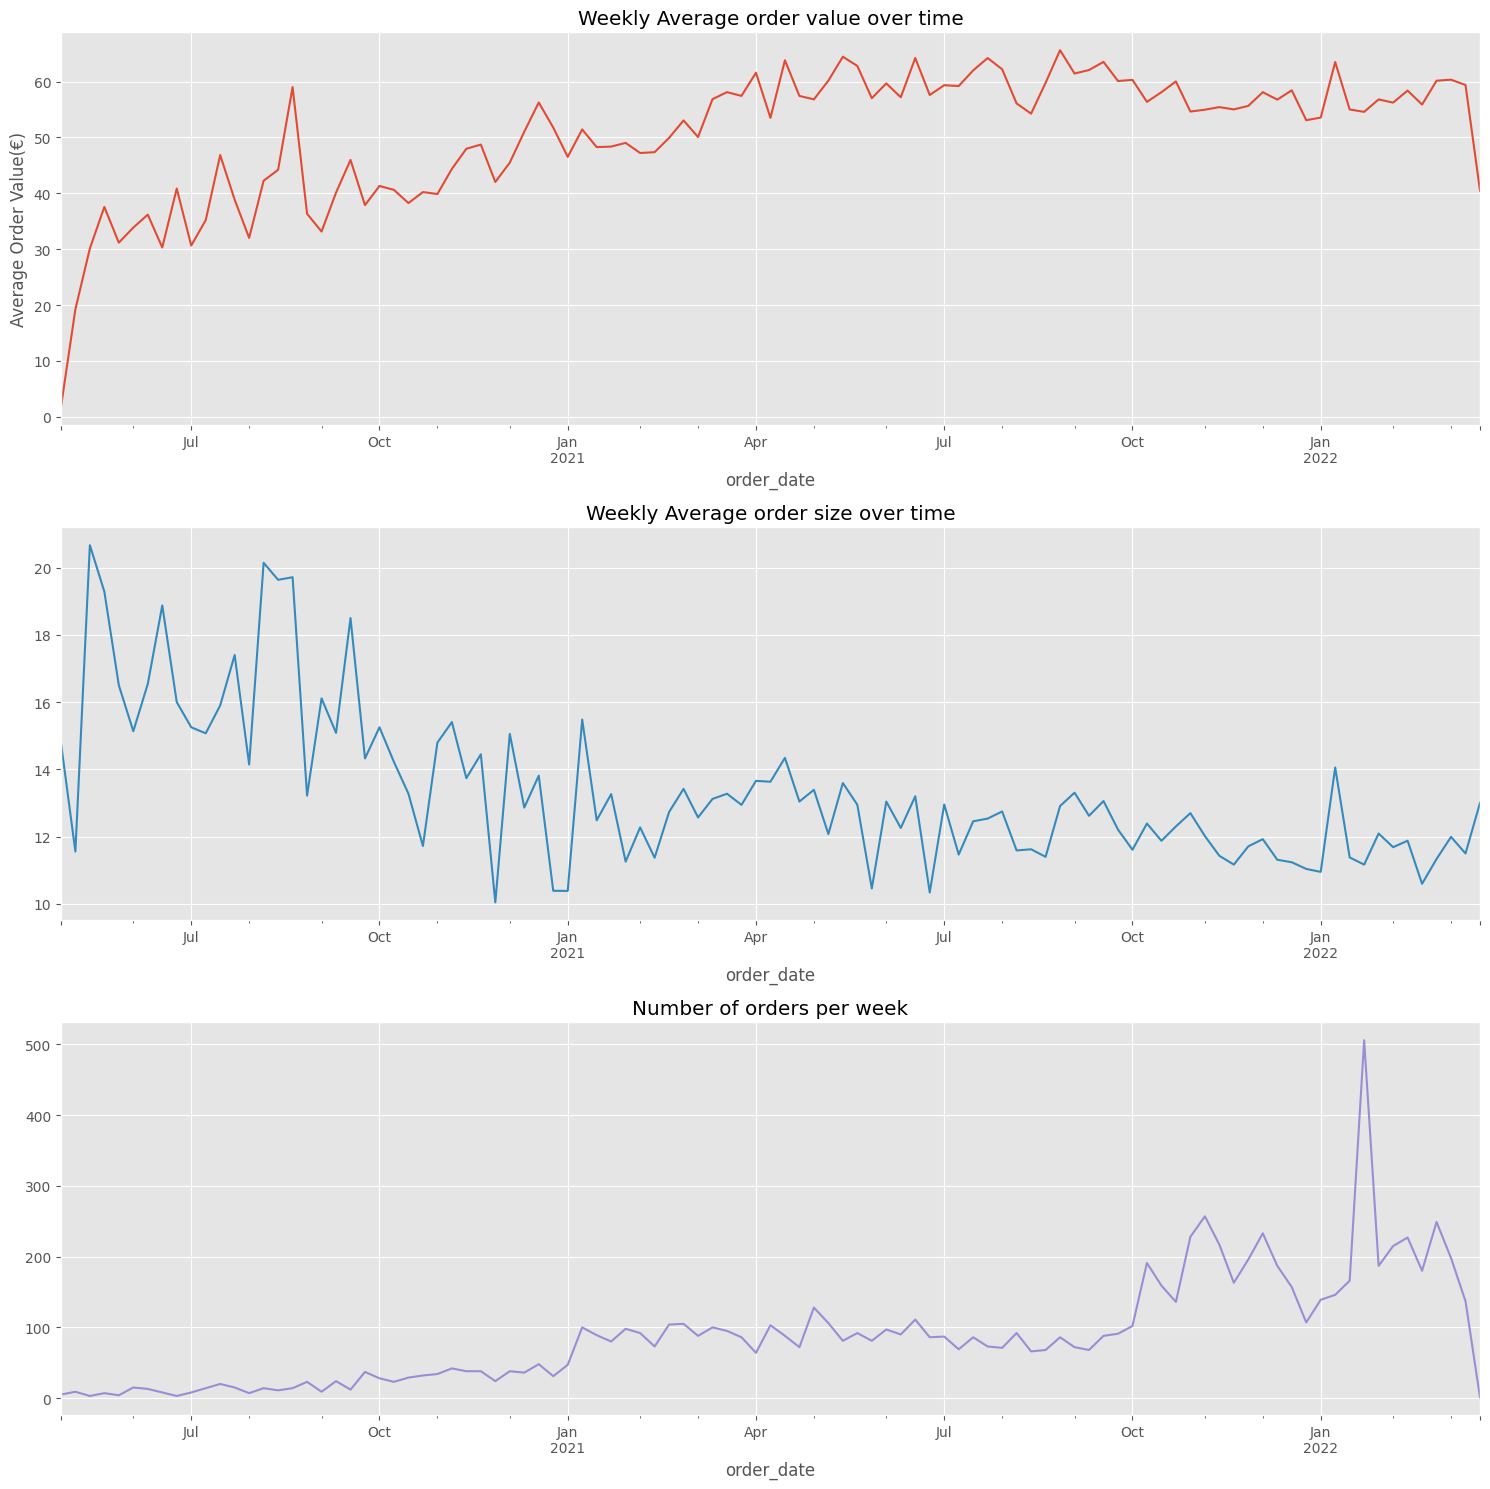

In [61]:
#evolucion semanal de precio de orden, tamaño de ordenes y numero de ordenes por semana
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

orders_size.groupby(pd.Grouper(key="order_date", freq="W"))["order_value"].mean().plot(ax=ax[0])
ax[0].set_ylabel("Average Order Value(€)")
ax[0].set_title("Weekly Average order value over time")


orders_size.groupby(pd.Grouper(key="order_date", freq="W"))["order_size"].mean().plot(ax=ax[1], color="C1")
ax[1].set_title("Weekly Average order size over time")

orders_size.groupby(pd.Grouper(key="order_date", freq="W"))["id"].nunique().plot(ax=ax[2], color="C2")
ax[2].set_title("Number of orders per week")


plt.tight_layout()


Tener cuidado al hacer plot de semanas/meses, asegurarse que de representamos periodos completos (el último siempre esta incompleto. como vemos en este grafico)

El tamaño de la orden ha disminuido, a pesar de que el negocio ha crecido en numero de pedidos por semana


El primer gráfico vemos que el valor sube por semanas, pero como vimos antes, el % de missing values para los primeros pedidos era muy alto, de hecho podemos ver como se parecen los graficos:



Text(0.5, 1.0, 'Weekly Average order size over time')

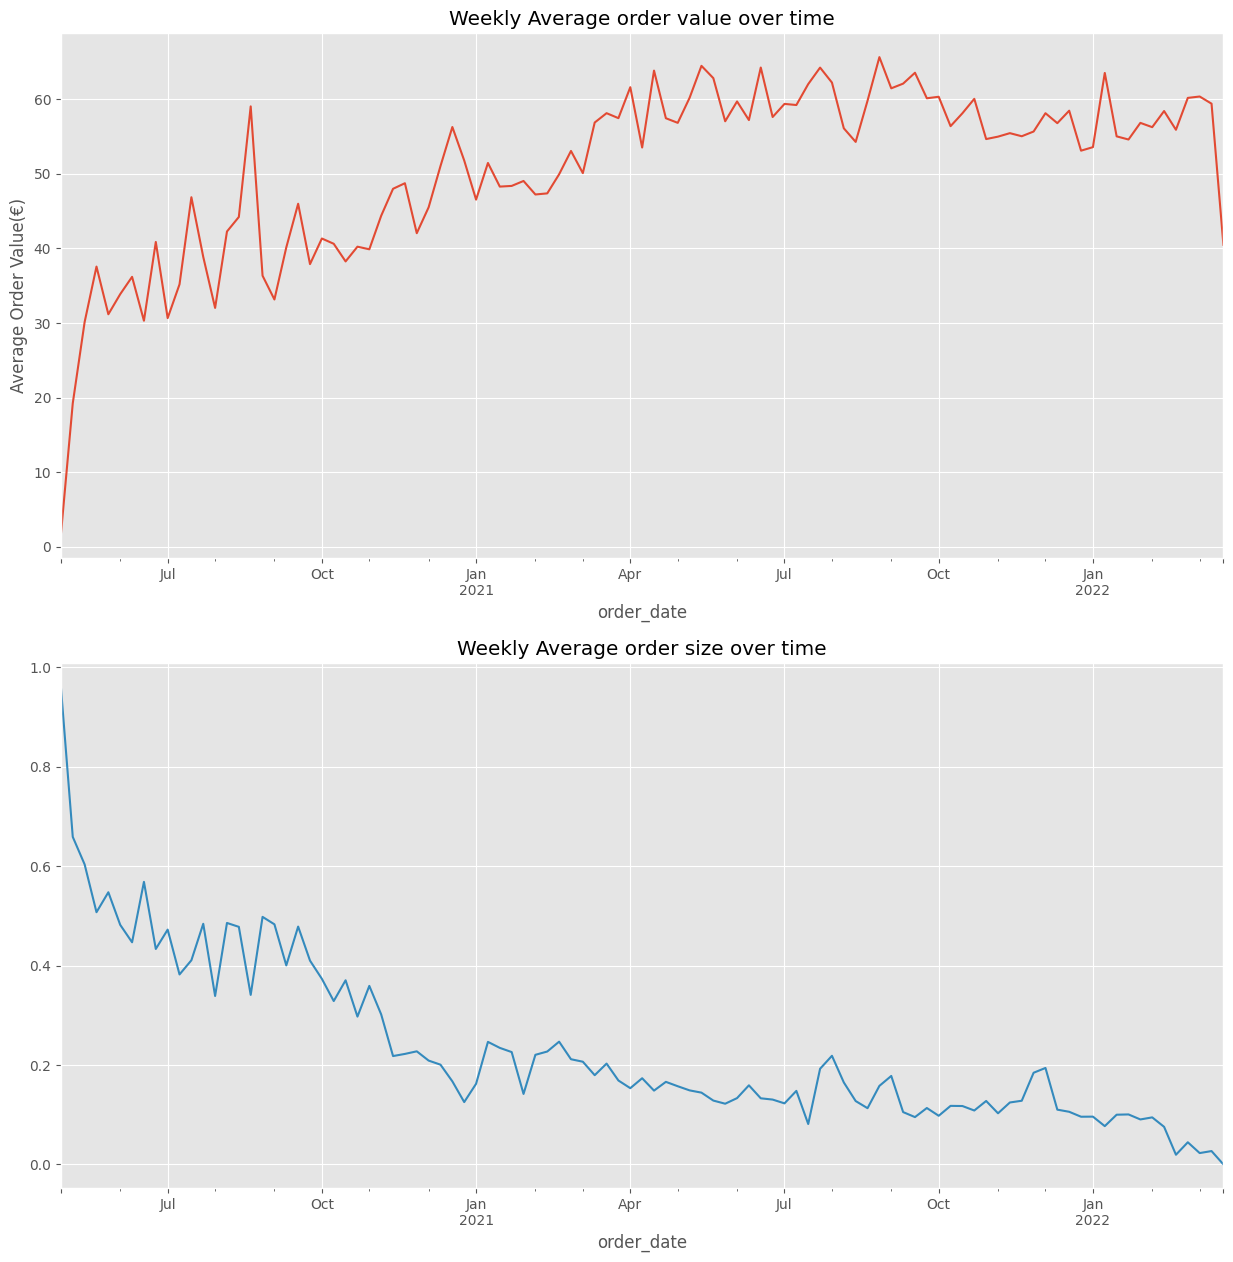

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

orders_size.groupby(pd.Grouper(key="order_date", freq="W"))["order_value"].mean().plot(ax=ax[0])
ax[0].set_ylabel("Average Order Value(€)")
ax[0].set_title("Weekly Average order value over time")


orders_size.groupby(pd.Grouper(key="order_date", freq="W"))["ratio_missing_prod_data"].mean().plot(ax=ax[1], color="C1")
ax[1].set_title("Weekly Average order size over time")

/tmp/ipykernel_57559/2631847486.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_cohort_stats)


    first_order_month  order_month_diff  retention_rate
0             2020-04                 0        1.000000
1             2020-04                 1        0.333333
2             2020-04                10        0.333333
3             2020-04                16        0.666667
4             2020-05                 0        1.000000
..                ...               ...             ...
261           2022-01                 1        0.155523
262           2022-01                 2        0.027616
263           2022-02                 0        1.000000
264           2022-02                 1        0.020979
265           2022-03                 0        1.000000

[266 rows x 3 columns]


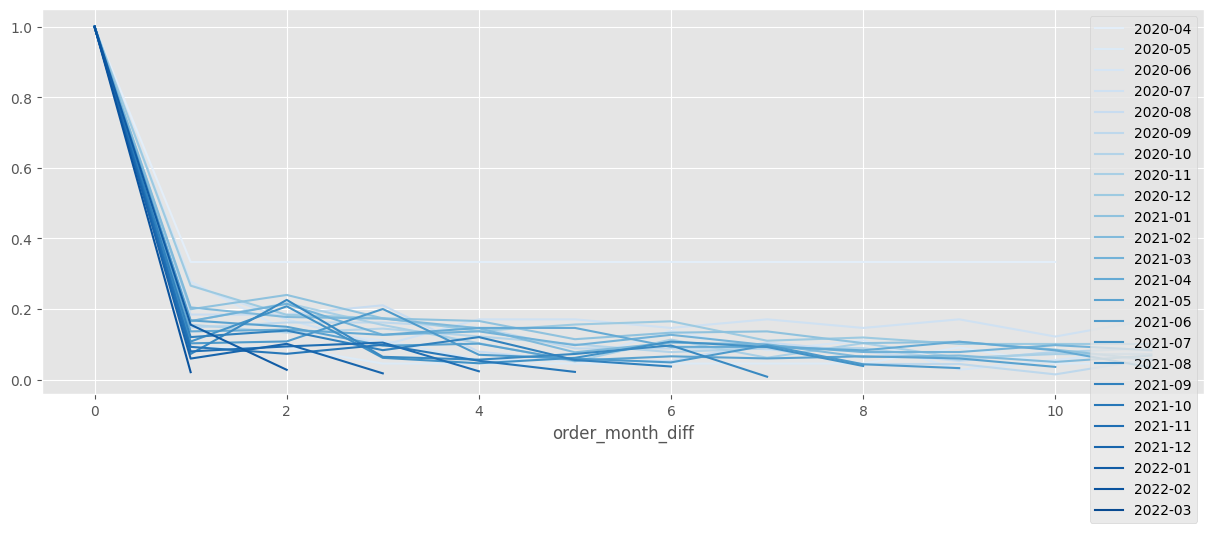

In [63]:
#analisis por cohorte
def compute_cohort_stats(x):
    cohort_size = x.loc[lambda x: x.order_month_diff == 0, "user_id"].nunique()
    return (x.groupby("order_month_diff")["user_id"].nunique() /cohort_size).rename("retention_rate")

retention_curves = (
    orders.assign(
        first_order_month=lambda x: x.groupby("user_id")["order_date"]
        .transform("min")
        .dt.to_period("M")
    )
    .assign(order_month=lambda x: x.order_date.dt.to_period("M"))
    .assign(
        order_month_diff=lambda x: (x.order_month - x.first_order_month).apply( 
            lambda x: x.n
        )
    )
    .groupby("first_order_month")
    .apply(compute_cohort_stats)
    .reset_index()    
)
print(retention_curves)

fig, ax = plt.subplots(figsize=(15,5))

colors = plt.cm.Blues(
    np.linspace(0.1, 0.9, retention_curves.first_order_month.nunique())
)

count = 0
for label, df in retention_curves.groupby("first_order_month"):
    df.loc[lambda x: x.order_month_diff < 12].plot(
        x="order_month_diff",
        y="retention_rate",
        ax=ax,
        label=label,
        color=colors[count]
    )
    count += 1



Cada linea es la retención mes a mes con respecto al mes del cohorte

`first_order_month`calcula el mes de la primera compra de cada `user_id`.

Se convierte la fecha de cada pedido `order_date`a formato de mes y `order_month_diff`calcula la diferencia en meses entre el mes de compra actual (order_month) y el mes de la primera compra (first_order_month).

Se agrupan los datos por el mes de la primera compra (cohorte) y se aplica la funcion `compute_cohort_stats` a cada cohorte para calcular la tasa de retención.

La tasa de retención en la función `compute_cohort_stats` primero calcula el tamaño de la cohorte (número de user_id) que realizaron su primera compra en el mes de la cohorte (order_month_diff == 0)

Se agrupan los datos por order_month_diff (diferencia en meses desde la primera compra) y para cada grupo se cuenta el número de usuarios unicos (user_id.nunique()) y por último se divide el número por el tamaño de la cohorte (cohort_size) para obtener la tasa de retención




Como es logico, los meses mas actuales van a tener 0 en los meses posteriores, ya que no tenemos los datos del futuro, voy a mostrar ahora los cohortes excluyendo los 12 ultimos meses (ya que analizamos 10 meses y asi todos los datos tienen info completa)

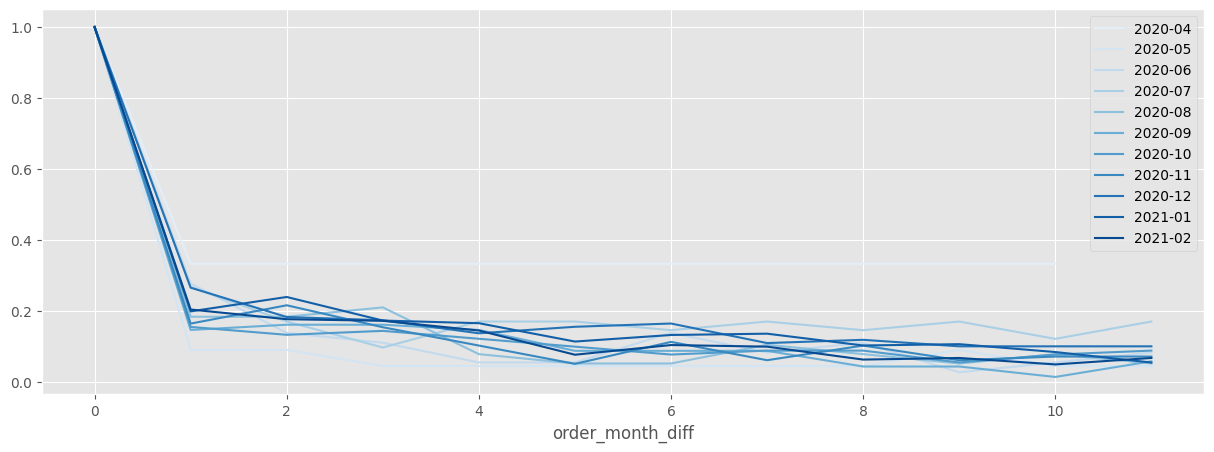

In [64]:
# Excluir cohortes recientes (por ejemplo, después de enero de 2022)
retention_curves_filtered = retention_curves[retention_curves.first_order_month < "2021-03"]

# Graficar solo los cohortes con datos completos
fig, ax = plt.subplots(figsize=(15,5))

colors = plt.cm.Blues(
    np.linspace(0.1, 0.9, retention_curves_filtered.first_order_month.nunique())
)

count = 0
for label, df in retention_curves_filtered.groupby("first_order_month"):
    df.loc[lambda x: x.order_month_diff < 12].plot(
        x="order_month_diff",
        y="retention_rate",
        ax=ax,
        label=label,
        color=colors[count]
    )
    count += 1



Es una metrica muy importante para los negocios, a la hora de calcular LTV (Lifetime Value) (valor total que gano por usuario)

Ejemplo lifetime value del primer año LTV=cumsum_12m(ret_curve)*AOV (Average order Value)

AOV, suele ser más o  fijo, Entonces el LTV depende mucho de la curva de retencion, si la curva no es alta no salen las cuentas

LTV es clave ya que ayuda a estimar cuanto vale un cliente a largo plazo y a determinar cuanto se puede gastar en adquirir nuevos clientes (CAC: Coste de Adquicisión de Cliente)

LTV >>> CAC, normalmente minimo x3>>>

## Insights

* 70% de los usuarios nunca han puesto una segunda orden (?) creo que son 5% segun los graficos

* Retention_rate por cohortes se estabiliza en torno a 10-15%. Segun avanzamos en el tiempo parece que los nuevos cohortes son peores.

* Limitación importante para analizar a nivel de cesta ya que solo tenemos información de los productos que vendemos hoy (inventory) pero no de todos los productos que hemos vendido en el pasado.

* En cuanto a basket composition, tenemos unas pocas categorías que aparecen en +30% de las compras -> Lo que la gente viene a comprar (anchor). A nivel de producto, tenemos Otaly que es comprado en casi el 20% de las cestas. Por qué?¿ ¿Somos más baratos? Riesgo de "race to the bottom" en precios? ¿Riesgo de supply?

    Race to the bottom es cuando, por competencia, las empresas reducen los precios continuamente para atraer más clientes, sacrificando margen de ganancia.
    Si una empresa compite solo en precio, los clientes atraidos suelen ser poco leales y abandonar rapidamente

* En estátocp vemos que el average order value es de 56€. En serie temporal, vemos como el valor de las cestas creció hasta abril 2021 y a partir de ahí se ha quedado flat.

* Potenciales probelmas:

    1. Retención empeorando con el tiempo. Los cohortes nuevos repiten menos

    2. AOV estancada. Es suficiente para ser rentables?

    3. Potencial riesgo de tener un producto tan exitoso



## Conclusiones

Cuidado con sacar conclusiones causales 

Cuando hay problemas en los datos entender si es un problema temporal, randomly distributed, etc

Dado los datos que tengo que preguntas pueden ser interesantes y como las puedo resolver

Analisis de distribuciones y temporales son muy importantes; Distribucion da una imagen estatica o global, y la representacion temporal da conocimiento de tendencias


# ***EDA***

In [65]:
feature_frame_path = '/home/alex/zriveAM/zrive-ds/aws/data/feature_frame.csv'
feature_frame_df = pd.read_csv(feature_frame_path)

In [66]:
feature_frame_df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [67]:
print('Dataframe info:')
print(feature_frame_df.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults        

In [68]:
print("Null values:")
print(feature_frame_df.isnull().sum())

Null values:
variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0

outcome
0.0    0.988463
1.0    0.011537
Name: proportion, dtype: float64


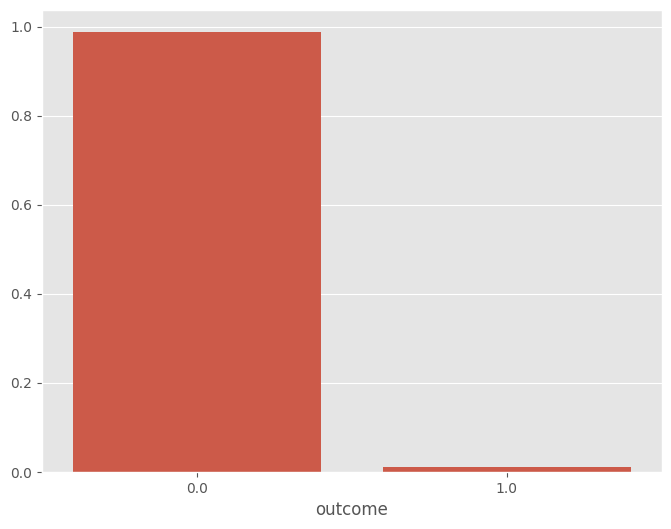

In [69]:
# Distribution of outcome
outcome_dist = feature_frame_df['outcome'].value_counts(normalize=True)
print(outcome_dist)

plt.figure(figsize=(8,6))
sns.barplot(x=outcome_dist.index, y= outcome_dist.values)
plt.show()

There are different types of columns, we can group them to do a better analysis

In [70]:
feature_frame_df.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [71]:
info_cols = ["variant_id", "order_id", "user_id", "created_at", "order_date"]
label_col = "outcome"
features_cols = [col for col in feature_frame_df.columns if col not in info_cols + [label_col]]

categorical_cols = ["product_type", "vendor"]
binary_cols = ["ordered_before", "abandoned_before", "active_snoozed", "set_as_regular"]
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [72]:
for col in binary_cols:
    print(f"Value counts {col}: {feature_frame_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {feature_frame_df.groupby(col)[label_col].mean().to_dict()}")
    print(" ------------ ")

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
 ------------ 
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
 ------------ 
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
 ------------ 
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
 ------------ 


Las features que nos indican si el usuario había interactuado con el producto antes (ordered, abandoned, snoozed, set_as_regular) estan muy desbalanceadas. Algunas como snooze o abandoned son muy extremas, quizas prodrían eliminarse o crear una meta feaure que represente si el usuario ha interactuado con el producto antes ( si cualquiera de las features anteriores es 1, meta feature es 1, si todas son 0, meta feature es 0)

These binary variables are strongly related with `outcome`.

Specifically, abandoned_before. If an item had not been abandoned before, it will only be purchased 1.11% of the time.

However, if an item had been abandoned before, it will be purchased 71.8 % of the time in a future order.

<Axes: >

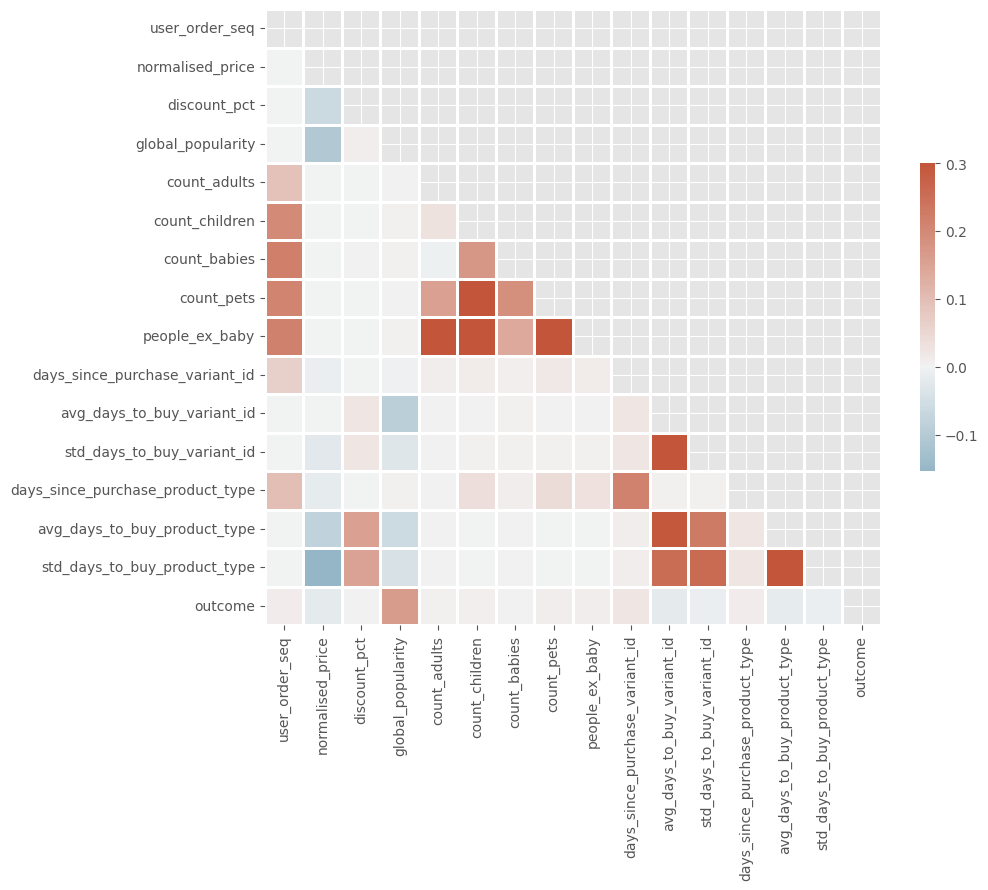

In [73]:
#Correlation matrix

corr = feature_frame_df[numerical_cols + [label_col]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink":0.5},
)

- Check correlations between variables

- Check correlations with outcome

Algunas variables númericas están moderadamente correladas. Algo a tener en cuenta si utilizamos modelos donde la colinearidad pueda ser importante.

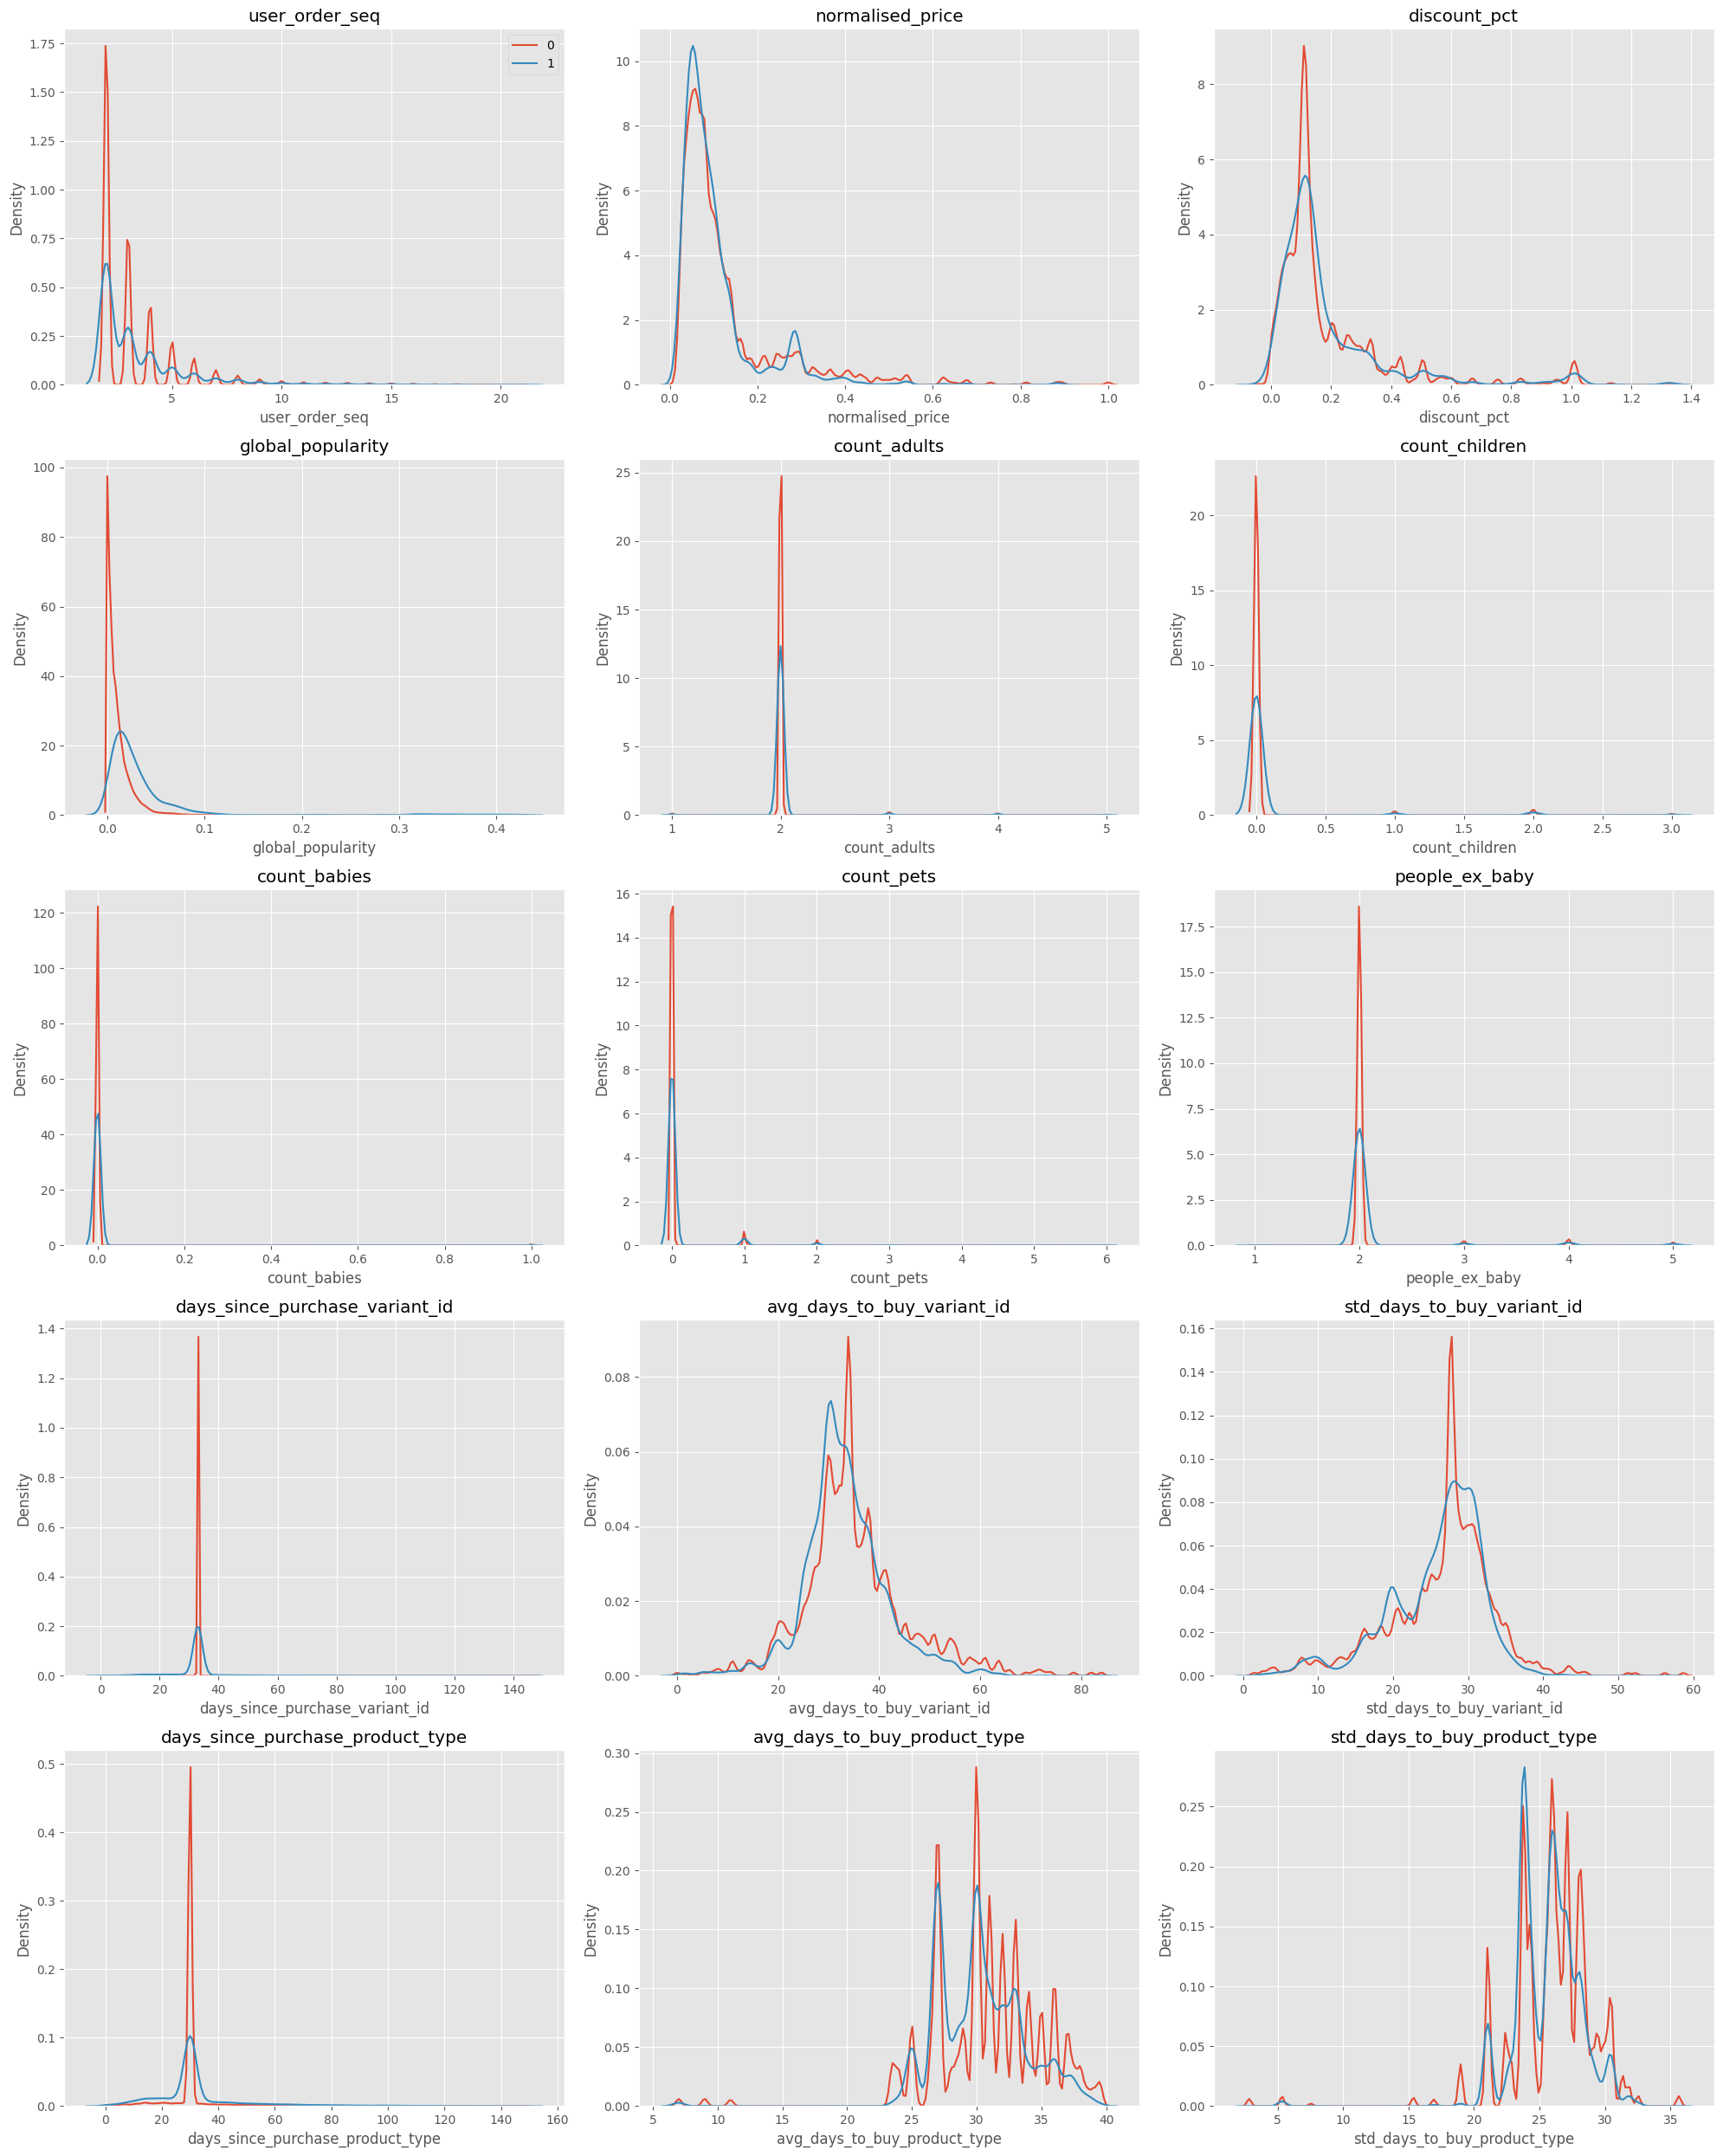

In [74]:
cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(20, 5 * rows))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(feature_frame_df.loc[lambda x: x.outcome == 0, col], label="0", ax=ax[i])
    sns.kdeplot(feature_frame_df.loc[lambda x: x.outcome == 1, col], label="1", ax=ax[i])
    ax[i].set_title(col)

ax[0].legend()
plt.tight_layout()

En este caso representamos las distribuciones para las dos clases (outcome 0 y outcome 1) de forma separada.
Saber si la distribución es distinta para cada una de las clases es muy informativo. 

* En global_popularity, cuando outcome=1, la popularidad de los productos es mas alta (cuando la popularidad es las alta, la probabilidad de que se compre es mas alta)

* Las variables de count_ siguen un patron extraño, ya que tienen unos picos extremadamente altos, esto se debe a que los missing values de estas variables se han imputado (ya sea con la media, mediana, freq...), esto lo que hace es que perdamos info, ya que quizas los usuarios que tenian esta info estaban muy correlados con outcome=1, se deberia haber añadido una columna que indique si el valor se ha imputado o no. Sin embargo, si aumenta el poder predictivo, es una buena imputacion, a pesar de la distribucion

In [75]:
feature_frame_df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828


Tienen muchas categorias, por lo que categorical enconding empezaria por frequency encoding o algo que no aumente el numero de columnas en 62 o 264.

Es cierto, que la mejor forma de hacer coding de las variables categoricas es aquella que mejore el poder predictivo de mi modelo, por eso en el siguiente modulo se ve como crear un pipeline de entrenamiento que optimice las decisiones.